In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

C:\Users\Mohua\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df=pd.read_csv('liver_disease_.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,Yes
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,Yes
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,Yes
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,No
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,Yes


In [3]:
df.dropna(how='any', inplace=True)

In [4]:
df.Gender[df.Gender=='Male']=1
df.Gender[df.Gender=='Female']=0


C:\Users\Mohua\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Mohua\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [5]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Dataset']=lb.fit_transform(df['Dataset'])

In [6]:
# Create numpy arraays for features and targets
X=df.drop('Dataset', axis=1).values
y=df['Dataset'].values

In [7]:
# Split train and test data 
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.4, random_state=42, stratify=y)

In [9]:
# import K neighbors
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Setting up arrays to store training and test accuracies
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_test, y_test)

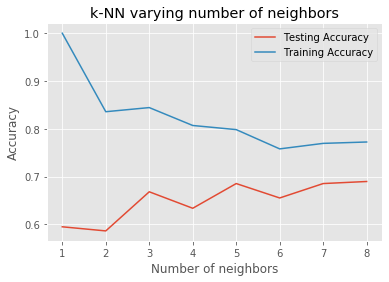

In [11]:
# Generate plot
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
# we see that the graphs have minimum gap at K=7, so we will fit the model for K=7
knn=KNeighborsClassifier(n_neighbors=7)


In [13]:
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [14]:
# Get accuracy scores
knn.score(X_test, y_test)

0.6853448275862069

In [15]:
y_pred=knn.predict(X_test)

In [16]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,17,49,66
1,24,142,166
All,41,191,232


In [17]:
# import classification report
from sklearn.metrics import classification_report


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.26      0.32        66
           1       0.74      0.86      0.80       166

    accuracy                           0.69       232
   macro avg       0.58      0.56      0.56       232
weighted avg       0.65      0.69      0.66       232



In [19]:
y_pred_proba=knn.predict_proba(X_test)[:,1]

In [20]:
# Plot ROC curves to compare different models built in the process 
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

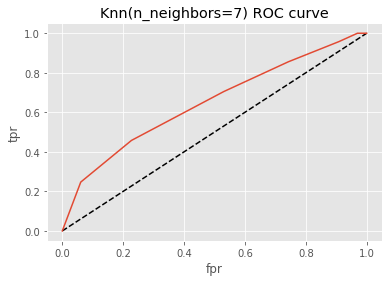

In [22]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.6485943775100402

In [24]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid={'n_neighbors':np.arange(1,50)}

In [44]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=13)
knn_cv.fit(X,y)

C:\Users\Mohua\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=13, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
knn_cv.best_score_

0.7115716753022453

In [46]:
knn_cv.best_params_

{'n_neighbors': 49}

In [47]:
y_pred_proba=knn_cv.predict_proba(X_test)[:,1]

In [48]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

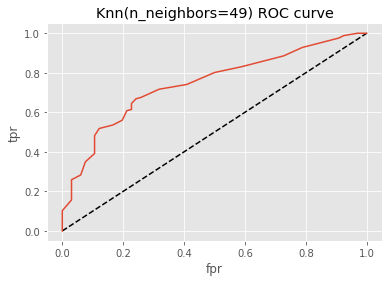

In [49]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=49) ROC curve')
plt.show()

In [50]:
roc_auc_score(y_test, y_pred_proba)

0.7450255567725448